In [55]:
pip install keras-rl2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [56]:
pip install h5py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [57]:
pip install gym

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [58]:
pip install pygame

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [59]:
import numpy as np
import gym
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adam
from rl.agents.dqn import DQNAgent
from rl.policy import EpsGreedyQPolicy
from rl.memory import SequentialMemory

import os
os.environ['SDL_VIDEODRIVER']='dummy'
import pygame
pygame.display.set_mode((640,480))

<Surface(640x480x32 SW)>

In [60]:
print(pygame.display.set_mode((640,480)))
os.environ['SDL_VIDEODRIVER']

<Surface(640x480x32 SW)>


'dummy'

In [61]:
ENV_NAME = 'CartPole-v0'
# Get the environment and extract the number of actions available in the Cartpole problem
env = gym.make(ENV_NAME)
np.random.seed(123)
env.seed(123)
nb_actions = env.action_space.n

/usr/local/lib/python3.8/dist-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(
/usr/local/lib/python3.8/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.8/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.8/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` inste

In [62]:
print(nb_actions)
print(env.observation_space)
print(env.reward_range)
print(env.spec)
print(env.metadata)

2
Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)
(-inf, inf)
EnvSpec(id='CartPole-v0', entry_point='gym.envs.classic_control.cartpole:CartPoleEnv', reward_threshold=195.0, nondeterministic=False, max_episode_steps=200, order_enforce=True, autoreset=False, disable_env_checker=False, new_step_api=False, kwargs={}, namespace=None, name='CartPole', version=0)
{'render_modes': ['human', 'rgb_array', 'single_rgb_array'], 'render_fps': 50}


In [63]:
model = Sequential()
model.add(Flatten(input_shape=(1,) + env.observation_space.shape))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(nb_actions))
model.add(Activation('linear'))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 4)                 0         
                                                                 
 dense_2 (Dense)             (None, 16)                80        
                                                                 
 activation_2 (Activation)   (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 2)                 34        
                                                                 
 activation_3 (Activation)   (None, 2)                 0         
                                                                 
Total params: 114
Trainable params: 114
Non-trainable params: 0
_________________________________________________________________
None


In [64]:
policy = EpsGreedyQPolicy()
memory = SequentialMemory(limit=50000, window_length=1)
dqn = DQNAgent(model=model, nb_actions=nb_actions, memory=memory,
nb_steps_warmup=10,
target_model_update=1e-2, policy=policy)
dqn.compile(Adam(lr=1e-3), metrics=['mae'])
# Okay, now it's time to learn something! We visualize the training here for show, but this slows down training quite a lot.
dqn.fit(env, nb_steps=5000, visualize=True, verbose=2)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Training for 5000 steps ...


/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


    9/5000: episode: 1, duration: 0.310s, episode steps:   9, steps per second:  29, episode reward:  9.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 1.000 [1.000, 1.000],  loss: --, mae: --, mean_q: --


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(
/usr/local/lib/python3.8/dist-packages/rl/memory.py:37: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')
/usr/local/lib/python3.8/dist-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 11 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)
/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `u

   21/5000: episode: 2, duration: 0.770s, episode steps:  12, steps per second:  16, episode reward: 12.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.833 [0.000, 1.000],  loss: 0.570419, mae: 0.877799, mean_q: 0.168263
   30/5000: episode: 3, duration: 0.184s, episode steps:   9, steps per second:  49, episode reward:  9.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 1.000 [1.000, 1.000],  loss: 0.500167, mae: 0.821885, mean_q: 0.274540


/usr/local/lib/python3.8/dist-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 23 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)
/usr/local/lib/python3.8/dist-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 24 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)
/usr/local/lib/python3.8/dist-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 25 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)
/usr/local/lib/python3.8/dist-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 26 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)
/usr/local/lib/python3.8/dist-packages/rl/memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 27 + 1) instead
  batch_idxs

   40/5000: episode: 4, duration: 0.199s, episode steps:  10, steps per second:  50, episode reward: 10.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 1.000 [1.000, 1.000],  loss: 0.404077, mae: 0.735982, mean_q: 0.372293


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


   51/5000: episode: 5, duration: 0.232s, episode steps:  11, steps per second:  47, episode reward: 11.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.909 [0.000, 1.000],  loss: 0.322618, mae: 0.680198, mean_q: 0.497712
   60/5000: episode: 6, duration: 0.186s, episode steps:   9, steps per second:  48, episode reward:  9.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 1.000 [1.000, 1.000],  loss: 0.294985, mae: 0.641771, mean_q: 0.592792


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(
/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


   69/5000: episode: 7, duration: 0.186s, episode steps:   9, steps per second:  48, episode reward:  9.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 1.000 [1.000, 1.000],  loss: 0.247416, mae: 0.619415, mean_q: 0.701496


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


   80/5000: episode: 8, duration: 0.224s, episode steps:  11, steps per second:  49, episode reward: 11.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 1.000 [1.000, 1.000],  loss: 0.249964, mae: 0.619480, mean_q: 0.808403


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(
/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


   90/5000: episode: 9, duration: 0.205s, episode steps:  10, steps per second:  49, episode reward: 10.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 1.000 [1.000, 1.000],  loss: 0.234750, mae: 0.608597, mean_q: 0.936987
  100/5000: episode: 10, duration: 0.198s, episode steps:  10, steps per second:  51, episode reward: 10.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.900 [0.000, 1.000],  loss: 0.256252, mae: 0.596078, mean_q: 0.985404


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(
/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


  109/5000: episode: 11, duration: 0.183s, episode steps:   9, steps per second:  49, episode reward:  9.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 1.000 [1.000, 1.000],  loss: 0.264631, mae: 0.589866, mean_q: 1.088988
  117/5000: episode: 12, duration: 0.161s, episode steps:   8, steps per second:  50, episode reward:  8.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 1.000 [1.000, 1.000],  loss: 0.235960, mae: 0.546788, mean_q: 1.140635


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(
/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


  125/5000: episode: 13, duration: 0.164s, episode steps:   8, steps per second:  49, episode reward:  8.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 1.000 [1.000, 1.000],  loss: 0.257143, mae: 0.538438, mean_q: 1.176351
  136/5000: episode: 14, duration: 0.218s, episode steps:  11, steps per second:  50, episode reward: 11.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.909 [0.000, 1.000],  loss: 0.252145, mae: 0.513435, mean_q: 1.275529
  145/5000: episode: 15, duration: 0.183s, episode steps:   9, steps per second:  49, episode reward:  9.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 1.000 [1.000, 1.000],  loss: 0.228539, mae: 0.466051, mean_q: 1.347275


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(
/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


  155/5000: episode: 16, duration: 0.200s, episode steps:  10, steps per second:  50, episode reward: 10.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 1.000 [1.000, 1.000],  loss: 0.231415, mae: 0.444135, mean_q: 1.425487


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


  164/5000: episode: 17, duration: 0.212s, episode steps:   9, steps per second:  43, episode reward:  9.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 1.000 [1.000, 1.000],  loss: 0.255287, mae: 0.433613, mean_q: 1.517545


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


  175/5000: episode: 18, duration: 0.268s, episode steps:  11, steps per second:  41, episode reward: 11.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.909 [0.000, 1.000],  loss: 0.256689, mae: 0.419650, mean_q: 1.580685


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


  185/5000: episode: 19, duration: 0.228s, episode steps:  10, steps per second:  44, episode reward: 10.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.900 [0.000, 1.000],  loss: 0.257427, mae: 0.409275, mean_q: 1.597385


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


  194/5000: episode: 20, duration: 0.229s, episode steps:   9, steps per second:  39, episode reward:  9.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 1.000 [1.000, 1.000],  loss: 0.229892, mae: 0.400748, mean_q: 1.619950
  202/5000: episode: 21, duration: 0.179s, episode steps:   8, steps per second:  45, episode reward:  8.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 1.000 [1.000, 1.000],  loss: 0.311635, mae: 0.468925, mean_q: 1.752344


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(
/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


  212/5000: episode: 22, duration: 0.209s, episode steps:  10, steps per second:  48, episode reward: 10.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 1.000 [1.000, 1.000],  loss: 0.273179, mae: 0.484326, mean_q: 1.738275


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


  222/5000: episode: 23, duration: 0.293s, episode steps:  10, steps per second:  34, episode reward: 10.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 1.000 [1.000, 1.000],  loss: 0.238061, mae: 0.501058, mean_q: 1.753817
  230/5000: episode: 24, duration: 0.195s, episode steps:   8, steps per second:  41, episode reward:  8.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 1.000 [1.000, 1.000],  loss: 0.269159, mae: 0.537024, mean_q: 1.909490


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(
/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


  238/5000: episode: 25, duration: 0.245s, episode steps:   8, steps per second:  33, episode reward:  8.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 1.000 [1.000, 1.000],  loss: 0.251421, mae: 0.546754, mean_q: 1.920079


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


  248/5000: episode: 26, duration: 0.247s, episode steps:  10, steps per second:  41, episode reward: 10.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 1.000 [1.000, 1.000],  loss: 0.271601, mae: 0.577824, mean_q: 2.021034


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


  258/5000: episode: 27, duration: 0.267s, episode steps:  10, steps per second:  37, episode reward: 10.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 1.000 [1.000, 1.000],  loss: 0.308477, mae: 0.650290, mean_q: 2.061543


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


  268/5000: episode: 28, duration: 0.276s, episode steps:  10, steps per second:  36, episode reward: 10.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 1.000 [1.000, 1.000],  loss: 0.271139, mae: 0.670832, mean_q: 2.060109


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


  277/5000: episode: 29, duration: 0.237s, episode steps:   9, steps per second:  38, episode reward:  9.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 1.000 [1.000, 1.000],  loss: 0.285797, mae: 0.694724, mean_q: 2.185688


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


  287/5000: episode: 30, duration: 0.221s, episode steps:  10, steps per second:  45, episode reward: 10.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 1.000 [1.000, 1.000],  loss: 0.317531, mae: 0.756881, mean_q: 2.264952


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


  297/5000: episode: 31, duration: 0.232s, episode steps:  10, steps per second:  43, episode reward: 10.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 1.000 [1.000, 1.000],  loss: 0.299923, mae: 0.790984, mean_q: 2.279896


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


  307/5000: episode: 32, duration: 0.307s, episode steps:  10, steps per second:  33, episode reward: 10.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.800 [0.000, 1.000],  loss: 0.260436, mae: 0.796129, mean_q: 2.313747


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


  316/5000: episode: 33, duration: 0.221s, episode steps:   9, steps per second:  41, episode reward:  9.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 1.000 [1.000, 1.000],  loss: 0.263554, mae: 0.820588, mean_q: 2.447146


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


  328/5000: episode: 34, duration: 0.278s, episode steps:  12, steps per second:  43, episode reward: 12.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.917 [0.000, 1.000],  loss: 0.332458, mae: 0.883437, mean_q: 2.546961


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


  336/5000: episode: 35, duration: 0.213s, episode steps:   8, steps per second:  38, episode reward:  8.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 1.000 [1.000, 1.000],  loss: 0.308307, mae: 0.921106, mean_q: 2.551656


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


  347/5000: episode: 36, duration: 0.257s, episode steps:  11, steps per second:  43, episode reward: 11.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.909 [0.000, 1.000],  loss: 0.315426, mae: 0.967715, mean_q: 2.595727


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


  357/5000: episode: 37, duration: 0.230s, episode steps:  10, steps per second:  43, episode reward: 10.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 1.000 [1.000, 1.000],  loss: 0.303926, mae: 0.999891, mean_q: 2.662541


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


  367/5000: episode: 38, duration: 0.337s, episode steps:  10, steps per second:  30, episode reward: 10.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.900 [0.000, 1.000],  loss: 0.350476, mae: 1.074082, mean_q: 2.710032


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


  377/5000: episode: 39, duration: 0.244s, episode steps:  10, steps per second:  41, episode reward: 10.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 1.000 [1.000, 1.000],  loss: 0.360835, mae: 1.098754, mean_q: 2.753573


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


  389/5000: episode: 40, duration: 0.287s, episode steps:  12, steps per second:  42, episode reward: 12.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.917 [0.000, 1.000],  loss: 0.332723, mae: 1.134431, mean_q: 2.807017


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


  398/5000: episode: 41, duration: 0.252s, episode steps:   9, steps per second:  36, episode reward:  9.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 1.000 [1.000, 1.000],  loss: 0.417815, mae: 1.224621, mean_q: 2.887016
  406/5000: episode: 42, duration: 0.191s, episode steps:   8, steps per second:  42, episode reward:  8.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 1.000 [1.000, 1.000],  loss: 0.355250, mae: 1.232624, mean_q: 2.867750


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(
/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


  416/5000: episode: 43, duration: 0.239s, episode steps:  10, steps per second:  42, episode reward: 10.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.900 [0.000, 1.000],  loss: 0.338146, mae: 1.257940, mean_q: 2.962350


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


  427/5000: episode: 44, duration: 0.318s, episode steps:  11, steps per second:  35, episode reward: 11.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.909 [0.000, 1.000],  loss: 0.316245, mae: 1.276025, mean_q: 3.041837


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


  437/5000: episode: 45, duration: 0.247s, episode steps:  10, steps per second:  40, episode reward: 10.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.900 [0.000, 1.000],  loss: 0.291914, mae: 1.323244, mean_q: 3.151840


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


  446/5000: episode: 46, duration: 0.263s, episode steps:   9, steps per second:  34, episode reward:  9.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 1.000 [1.000, 1.000],  loss: 0.372675, mae: 1.395442, mean_q: 3.208209


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


  455/5000: episode: 47, duration: 0.236s, episode steps:   9, steps per second:  38, episode reward:  9.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.889 [0.000, 1.000],  loss: 0.294836, mae: 1.410864, mean_q: 3.248428
  464/5000: episode: 48, duration: 0.199s, episode steps:   9, steps per second:  45, episode reward:  9.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 1.000 [1.000, 1.000],  loss: 0.286049, mae: 1.430846, mean_q: 3.295826


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(
/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


  473/5000: episode: 49, duration: 0.313s, episode steps:   9, steps per second:  29, episode reward:  9.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 1.000 [1.000, 1.000],  loss: 0.305492, mae: 1.460290, mean_q: 3.382173
  481/5000: episode: 50, duration: 0.184s, episode steps:   8, steps per second:  44, episode reward:  8.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 1.000 [1.000, 1.000],  loss: 0.389903, mae: 1.540334, mean_q: 3.428025


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(
/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


  490/5000: episode: 51, duration: 0.210s, episode steps:   9, steps per second:  43, episode reward:  9.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.889 [0.000, 1.000],  loss: 0.331952, mae: 1.559606, mean_q: 3.403172


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


  500/5000: episode: 52, duration: 0.240s, episode steps:  10, steps per second:  42, episode reward: 10.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.900 [0.000, 1.000],  loss: 0.353201, mae: 1.621097, mean_q: 3.416671


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


  511/5000: episode: 53, duration: 0.262s, episode steps:  11, steps per second:  42, episode reward: 11.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.818 [0.000, 1.000],  loss: 0.321053, mae: 1.602450, mean_q: 3.532505


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


  521/5000: episode: 54, duration: 0.249s, episode steps:  10, steps per second:  40, episode reward: 10.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.900 [0.000, 1.000],  loss: 0.262462, mae: 1.589353, mean_q: 3.607255


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


  530/5000: episode: 55, duration: 0.240s, episode steps:   9, steps per second:  38, episode reward:  9.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.889 [0.000, 1.000],  loss: 0.364996, mae: 1.677248, mean_q: 3.700862


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


  540/5000: episode: 56, duration: 0.244s, episode steps:  10, steps per second:  41, episode reward: 10.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.800 [0.000, 1.000],  loss: 0.311620, mae: 1.663453, mean_q: 3.737256


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


  548/5000: episode: 57, duration: 0.263s, episode steps:   8, steps per second:  30, episode reward:  8.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.875 [0.000, 1.000],  loss: 0.394221, mae: 1.719925, mean_q: 3.745853


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


  559/5000: episode: 58, duration: 0.287s, episode steps:  11, steps per second:  38, episode reward: 11.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.818 [0.000, 1.000],  loss: 0.345970, mae: 1.715254, mean_q: 3.745627


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


  571/5000: episode: 59, duration: 0.260s, episode steps:  12, steps per second:  46, episode reward: 12.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.833 [0.000, 1.000],  loss: 0.331794, mae: 1.687794, mean_q: 3.886656


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


  581/5000: episode: 60, duration: 0.310s, episode steps:  10, steps per second:  32, episode reward: 10.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.800 [0.000, 1.000],  loss: 0.354966, mae: 1.736451, mean_q: 3.879963
  589/5000: episode: 61, duration: 0.169s, episode steps:   8, steps per second:  47, episode reward:  8.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.875 [0.000, 1.000],  loss: 0.338198, mae: 1.755239, mean_q: 3.902267


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(
/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


  600/5000: episode: 62, duration: 0.248s, episode steps:  11, steps per second:  44, episode reward: 11.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.818 [0.000, 1.000],  loss: 0.282282, mae: 1.718716, mean_q: 4.012368


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


  609/5000: episode: 63, duration: 0.239s, episode steps:   9, steps per second:  38, episode reward:  9.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.889 [0.000, 1.000],  loss: 0.451454, mae: 1.820235, mean_q: 4.032526


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


  619/5000: episode: 64, duration: 0.244s, episode steps:  10, steps per second:  41, episode reward: 10.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.800 [0.000, 1.000],  loss: 0.270850, mae: 1.726382, mean_q: 4.060304


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


  629/5000: episode: 65, duration: 0.245s, episode steps:  10, steps per second:  41, episode reward: 10.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.900 [0.000, 1.000],  loss: 0.336474, mae: 1.750534, mean_q: 4.156171


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


  638/5000: episode: 66, duration: 0.282s, episode steps:   9, steps per second:  32, episode reward:  9.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.889 [0.000, 1.000],  loss: 0.234771, mae: 1.680848, mean_q: 4.234892


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


  649/5000: episode: 67, duration: 0.388s, episode steps:  11, steps per second:  28, episode reward: 11.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.909 [0.000, 1.000],  loss: 0.301966, mae: 1.705879, mean_q: 4.217834


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


  659/5000: episode: 68, duration: 0.349s, episode steps:  10, steps per second:  29, episode reward: 10.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.900 [0.000, 1.000],  loss: 0.252979, mae: 1.675668, mean_q: 4.292876


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


  668/5000: episode: 69, duration: 0.293s, episode steps:   9, steps per second:  31, episode reward:  9.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 1.000 [1.000, 1.000],  loss: 0.305868, mae: 1.725508, mean_q: 4.347590


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


  683/5000: episode: 70, duration: 0.331s, episode steps:  15, steps per second:  45, episode reward: 15.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.733 [0.000, 1.000],  loss: 0.347516, mae: 1.777954, mean_q: 4.406218


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


  691/5000: episode: 71, duration: 0.323s, episode steps:   8, steps per second:  25, episode reward:  8.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.875 [0.000, 1.000],  loss: 0.304244, mae: 1.825526, mean_q: 4.518426


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


  700/5000: episode: 72, duration: 0.262s, episode steps:   9, steps per second:  34, episode reward:  9.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.889 [0.000, 1.000],  loss: 0.255821, mae: 1.815688, mean_q: 4.518578


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


  709/5000: episode: 73, duration: 0.249s, episode steps:   9, steps per second:  36, episode reward:  9.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.889 [0.000, 1.000],  loss: 0.261482, mae: 1.841733, mean_q: 4.611884


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


  719/5000: episode: 74, duration: 0.342s, episode steps:  10, steps per second:  29, episode reward: 10.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.800 [0.000, 1.000],  loss: 0.342948, mae: 1.917816, mean_q: 4.575413


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


  728/5000: episode: 75, duration: 0.262s, episode steps:   9, steps per second:  34, episode reward:  9.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.889 [0.000, 1.000],  loss: 0.264522, mae: 1.915595, mean_q: 4.559453


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


  738/5000: episode: 76, duration: 0.337s, episode steps:  10, steps per second:  30, episode reward: 10.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.800 [0.000, 1.000],  loss: 0.237926, mae: 1.896997, mean_q: 4.794647


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


  749/5000: episode: 77, duration: 0.259s, episode steps:  11, steps per second:  42, episode reward: 11.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.818 [0.000, 1.000],  loss: 0.282463, mae: 1.912008, mean_q: 4.773561


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


  758/5000: episode: 78, duration: 0.230s, episode steps:   9, steps per second:  39, episode reward:  9.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.889 [0.000, 1.000],  loss: 0.293941, mae: 1.937020, mean_q: 4.686003


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


  768/5000: episode: 79, duration: 0.254s, episode steps:  10, steps per second:  39, episode reward: 10.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.900 [0.000, 1.000],  loss: 0.283011, mae: 1.934854, mean_q: 4.764808


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


  779/5000: episode: 80, duration: 0.276s, episode steps:  11, steps per second:  40, episode reward: 11.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.818 [0.000, 1.000],  loss: 0.251405, mae: 1.890505, mean_q: 4.917419


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


  788/5000: episode: 81, duration: 0.289s, episode steps:   9, steps per second:  31, episode reward:  9.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.889 [0.000, 1.000],  loss: 0.284967, mae: 1.898039, mean_q: 4.840165


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


  796/5000: episode: 82, duration: 0.241s, episode steps:   8, steps per second:  33, episode reward:  8.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 1.000 [1.000, 1.000],  loss: 0.359192, mae: 1.985843, mean_q: 4.948539


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


  806/5000: episode: 83, duration: 0.316s, episode steps:  10, steps per second:  32, episode reward: 10.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.800 [0.000, 1.000],  loss: 0.326793, mae: 1.958019, mean_q: 4.844021


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


  815/5000: episode: 84, duration: 0.224s, episode steps:   9, steps per second:  40, episode reward:  9.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.889 [0.000, 1.000],  loss: 0.308463, mae: 1.954277, mean_q: 4.849005


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


  825/5000: episode: 85, duration: 0.269s, episode steps:  10, steps per second:  37, episode reward: 10.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.900 [0.000, 1.000],  loss: 0.305897, mae: 1.947905, mean_q: 4.799197


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


  837/5000: episode: 86, duration: 0.253s, episode steps:  12, steps per second:  47, episode reward: 12.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.833 [0.000, 1.000],  loss: 0.301008, mae: 1.964836, mean_q: 5.048020


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


  848/5000: episode: 87, duration: 0.342s, episode steps:  11, steps per second:  32, episode reward: 11.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.909 [0.000, 1.000],  loss: 0.314241, mae: 1.990189, mean_q: 4.981233


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


  857/5000: episode: 88, duration: 0.371s, episode steps:   9, steps per second:  24, episode reward:  9.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 1.000 [1.000, 1.000],  loss: 0.301564, mae: 2.010830, mean_q: 5.057619


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


  868/5000: episode: 89, duration: 0.419s, episode steps:  11, steps per second:  26, episode reward: 11.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.818 [0.000, 1.000],  loss: 0.284317, mae: 2.004177, mean_q: 5.109605


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


  878/5000: episode: 90, duration: 0.300s, episode steps:  10, steps per second:  33, episode reward: 10.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 1.000 [1.000, 1.000],  loss: 0.227517, mae: 2.040071, mean_q: 5.238198


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


  886/5000: episode: 91, duration: 0.237s, episode steps:   8, steps per second:  34, episode reward:  8.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 1.000 [1.000, 1.000],  loss: 0.252886, mae: 2.046773, mean_q: 5.253901


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


  902/5000: episode: 92, duration: 0.501s, episode steps:  16, steps per second:  32, episode reward: 16.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.750 [0.000, 1.000],  loss: 0.269248, mae: 2.071721, mean_q: 5.173069
  911/5000: episode: 93, duration: 0.196s, episode steps:   9, steps per second:  46, episode reward:  9.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.889 [0.000, 1.000],  loss: 0.214336, mae: 2.112266, mean_q: 5.339091


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(
/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


  922/5000: episode: 94, duration: 0.230s, episode steps:  11, steps per second:  48, episode reward: 11.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.818 [0.000, 1.000],  loss: 0.302590, mae: 2.172008, mean_q: 5.317728


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


  933/5000: episode: 95, duration: 0.221s, episode steps:  11, steps per second:  50, episode reward: 11.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.727 [0.000, 1.000],  loss: 0.177265, mae: 2.161841, mean_q: 5.302484
  943/5000: episode: 96, duration: 0.198s, episode steps:  10, steps per second:  51, episode reward: 10.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.800 [0.000, 1.000],  loss: 0.286901, mae: 2.269860, mean_q: 5.346368


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(
/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


  954/5000: episode: 97, duration: 0.235s, episode steps:  11, steps per second:  47, episode reward: 11.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.818 [0.000, 1.000],  loss: 0.258685, mae: 2.301805, mean_q: 5.387291
  963/5000: episode: 98, duration: 0.179s, episode steps:   9, steps per second:  50, episode reward:  9.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.889 [0.000, 1.000],  loss: 0.309504, mae: 2.344638, mean_q: 5.374665


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(
/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


  975/5000: episode: 99, duration: 0.240s, episode steps:  12, steps per second:  50, episode reward: 12.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.750 [0.000, 1.000],  loss: 0.181770, mae: 2.354997, mean_q: 5.548901


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


  986/5000: episode: 100, duration: 0.228s, episode steps:  11, steps per second:  48, episode reward: 11.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.727 [0.000, 1.000],  loss: 0.203624, mae: 2.388623, mean_q: 5.531181
  995/5000: episode: 101, duration: 0.181s, episode steps:   9, steps per second:  50, episode reward:  9.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.889 [0.000, 1.000],  loss: 0.257104, mae: 2.440522, mean_q: 5.562246


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(
/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 1009/5000: episode: 102, duration: 0.282s, episode steps:  14, steps per second:  50, episode reward: 14.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.643 [0.000, 1.000],  loss: 0.225936, mae: 2.456326, mean_q: 5.513095


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 1022/5000: episode: 103, duration: 0.262s, episode steps:  13, steps per second:  50, episode reward: 13.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.769 [0.000, 1.000],  loss: 0.183804, mae: 2.412259, mean_q: 5.450789


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 1032/5000: episode: 104, duration: 0.214s, episode steps:  10, steps per second:  47, episode reward: 10.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.900 [0.000, 1.000],  loss: 0.207938, mae: 2.463001, mean_q: 5.550037


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(
/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 1042/5000: episode: 105, duration: 0.203s, episode steps:  10, steps per second:  49, episode reward: 10.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.800 [0.000, 1.000],  loss: 0.176302, mae: 2.450087, mean_q: 5.534658
 1052/5000: episode: 106, duration: 0.196s, episode steps:  10, steps per second:  51, episode reward: 10.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.800 [0.000, 1.000],  loss: 0.237083, mae: 2.505805, mean_q: 5.588433


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(
/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 1061/5000: episode: 107, duration: 0.184s, episode steps:   9, steps per second:  49, episode reward:  9.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.778 [0.000, 1.000],  loss: 0.246512, mae: 2.543740, mean_q: 5.588871
 1072/5000: episode: 108, duration: 0.220s, episode steps:  11, steps per second:  50, episode reward: 11.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.727 [0.000, 1.000],  loss: 0.222799, mae: 2.570001, mean_q: 5.654997


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 1082/5000: episode: 109, duration: 0.208s, episode steps:  10, steps per second:  48, episode reward: 10.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.800 [0.000, 1.000],  loss: 0.187215, mae: 2.591667, mean_q: 5.717506


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 1094/5000: episode: 110, duration: 0.243s, episode steps:  12, steps per second:  49, episode reward: 12.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.750 [0.000, 1.000],  loss: 0.182782, mae: 2.609610, mean_q: 5.703178


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 1106/5000: episode: 111, duration: 0.241s, episode steps:  12, steps per second:  50, episode reward: 12.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.667 [0.000, 1.000],  loss: 0.145355, mae: 2.681932, mean_q: 5.893443


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 1117/5000: episode: 112, duration: 0.223s, episode steps:  11, steps per second:  49, episode reward: 11.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.727 [0.000, 1.000],  loss: 0.162180, mae: 2.718710, mean_q: 5.931983
 1126/5000: episode: 113, duration: 0.178s, episode steps:   9, steps per second:  51, episode reward:  9.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.889 [0.000, 1.000],  loss: 0.195166, mae: 2.705309, mean_q: 5.772678


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(
/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 1135/5000: episode: 114, duration: 0.182s, episode steps:   9, steps per second:  50, episode reward:  9.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.778 [0.000, 1.000],  loss: 0.204515, mae: 2.726012, mean_q: 5.786422


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 1146/5000: episode: 115, duration: 0.227s, episode steps:  11, steps per second:  49, episode reward: 11.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.636 [0.000, 1.000],  loss: 0.174306, mae: 2.741817, mean_q: 5.860365
 1156/5000: episode: 116, duration: 0.198s, episode steps:  10, steps per second:  51, episode reward: 10.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.700 [0.000, 1.000],  loss: 0.226236, mae: 2.854312, mean_q: 6.072371


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(
/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 1167/5000: episode: 117, duration: 0.221s, episode steps:  11, steps per second:  50, episode reward: 11.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.727 [0.000, 1.000],  loss: 0.138929, mae: 2.809553, mean_q: 6.087339


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 1177/5000: episode: 118, duration: 0.206s, episode steps:  10, steps per second:  49, episode reward: 10.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.700 [0.000, 1.000],  loss: 0.169961, mae: 2.715420, mean_q: 5.745615
 1187/5000: episode: 119, duration: 0.198s, episode steps:  10, steps per second:  51, episode reward: 10.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.700 [0.000, 1.000],  loss: 0.175000, mae: 2.892565, mean_q: 6.126638


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(
/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 1197/5000: episode: 120, duration: 0.207s, episode steps:  10, steps per second:  48, episode reward: 10.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.700 [0.000, 1.000],  loss: 0.151715, mae: 2.887079, mean_q: 6.098330


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 1208/5000: episode: 121, duration: 0.226s, episode steps:  11, steps per second:  49, episode reward: 11.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.727 [0.000, 1.000],  loss: 0.167109, mae: 2.852740, mean_q: 5.954056


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 1219/5000: episode: 122, duration: 0.223s, episode steps:  11, steps per second:  49, episode reward: 11.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.727 [0.000, 1.000],  loss: 0.191658, mae: 2.805285, mean_q: 5.784886
 1229/5000: episode: 123, duration: 0.197s, episode steps:  10, steps per second:  51, episode reward: 10.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.700 [0.000, 1.000],  loss: 0.188469, mae: 2.843333, mean_q: 5.866752


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(
/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 1240/5000: episode: 124, duration: 0.221s, episode steps:  11, steps per second:  50, episode reward: 11.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.636 [0.000, 1.000],  loss: 0.197788, mae: 2.894505, mean_q: 5.945938


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 1252/5000: episode: 125, duration: 0.240s, episode steps:  12, steps per second:  50, episode reward: 12.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.667 [0.000, 1.000],  loss: 0.157794, mae: 2.896172, mean_q: 5.925804


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 1264/5000: episode: 126, duration: 0.240s, episode steps:  12, steps per second:  50, episode reward: 12.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.583 [0.000, 1.000],  loss: 0.180669, mae: 3.006559, mean_q: 6.070820


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 1274/5000: episode: 127, duration: 0.206s, episode steps:  10, steps per second:  49, episode reward: 10.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.700 [0.000, 1.000],  loss: 0.178914, mae: 2.989017, mean_q: 6.015823
 1284/5000: episode: 128, duration: 0.198s, episode steps:  10, steps per second:  51, episode reward: 10.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.700 [0.000, 1.000],  loss: 0.176219, mae: 3.071827, mean_q: 6.190924


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(
/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 1296/5000: episode: 129, duration: 0.248s, episode steps:  12, steps per second:  48, episode reward: 12.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.667 [0.000, 1.000],  loss: 0.176083, mae: 3.019702, mean_q: 6.024514


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 1311/5000: episode: 130, duration: 0.300s, episode steps:  15, steps per second:  50, episode reward: 15.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.533 [0.000, 1.000],  loss: 0.199437, mae: 3.016661, mean_q: 5.985991


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 1322/5000: episode: 131, duration: 0.224s, episode steps:  11, steps per second:  49, episode reward: 11.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.636 [0.000, 1.000],  loss: 0.197395, mae: 3.109232, mean_q: 6.169243


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 1334/5000: episode: 132, duration: 0.236s, episode steps:  12, steps per second:  51, episode reward: 12.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.583 [0.000, 1.000],  loss: 0.196184, mae: 3.070875, mean_q: 6.066588


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 1346/5000: episode: 133, duration: 0.243s, episode steps:  12, steps per second:  49, episode reward: 12.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.583 [0.000, 1.000],  loss: 0.142846, mae: 3.226066, mean_q: 6.423008


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 1359/5000: episode: 134, duration: 0.262s, episode steps:  13, steps per second:  50, episode reward: 13.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.615 [0.000, 1.000],  loss: 0.227442, mae: 3.117952, mean_q: 6.077817


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 1373/5000: episode: 135, duration: 0.283s, episode steps:  14, steps per second:  49, episode reward: 14.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.571 [0.000, 1.000],  loss: 0.140015, mae: 3.323771, mean_q: 6.538093


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 1388/5000: episode: 136, duration: 0.299s, episode steps:  15, steps per second:  50, episode reward: 15.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.533 [0.000, 1.000],  loss: 0.169879, mae: 3.245050, mean_q: 6.323664


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 1410/5000: episode: 137, duration: 0.445s, episode steps:  22, steps per second:  49, episode reward: 22.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.500 [0.000, 1.000],  loss: 0.190086, mae: 3.280218, mean_q: 6.345354


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 1427/5000: episode: 138, duration: 0.344s, episode steps:  17, steps per second:  49, episode reward: 17.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.471 [0.000, 1.000],  loss: 0.217323, mae: 3.323128, mean_q: 6.418950


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 1452/5000: episode: 139, duration: 0.505s, episode steps:  25, steps per second:  49, episode reward: 25.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.480 [0.000, 1.000],  loss: 0.219935, mae: 3.345915, mean_q: 6.417409


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 1469/5000: episode: 140, duration: 0.343s, episode steps:  17, steps per second:  50, episode reward: 17.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.471 [0.000, 1.000],  loss: 0.283368, mae: 3.432740, mean_q: 6.544184


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 1498/5000: episode: 141, duration: 0.582s, episode steps:  29, steps per second:  50, episode reward: 29.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.448 [0.000, 1.000],  loss: 0.228233, mae: 3.418226, mean_q: 6.528337
 1507/5000: episode: 142, duration: 0.185s, episode steps:   9, steps per second:  49, episode reward:  9.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.000 [0.000, 0.000],  loss: 0.261417, mae: 3.542865, mean_q: 6.752138


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(
/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 1516/5000: episode: 143, duration: 0.180s, episode steps:   9, steps per second:  50, episode reward:  9.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.000 [0.000, 0.000],  loss: 0.586705, mae: 3.671738, mean_q: 7.008072


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 1526/5000: episode: 144, duration: 0.202s, episode steps:  10, steps per second:  49, episode reward: 10.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.000 [0.000, 0.000],  loss: 0.201537, mae: 3.646630, mean_q: 7.013274
 1535/5000: episode: 145, duration: 0.180s, episode steps:   9, steps per second:  50, episode reward:  9.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.000 [0.000, 0.000],  loss: 0.305133, mae: 3.679554, mean_q: 7.047134


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(
/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(
/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 1544/5000: episode: 146, duration: 0.181s, episode steps:   9, steps per second:  50, episode reward:  9.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.000 [0.000, 0.000],  loss: 0.635221, mae: 3.581468, mean_q: 6.834902
 1552/5000: episode: 147, duration: 0.162s, episode steps:   8, steps per second:  49, episode reward:  8.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.000 [0.000, 0.000],  loss: 0.377925, mae: 3.464477, mean_q: 6.558402


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 1564/5000: episode: 148, duration: 0.245s, episode steps:  12, steps per second:  49, episode reward: 12.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.083 [0.000, 1.000],  loss: 0.877879, mae: 3.788193, mean_q: 7.215486


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 1574/5000: episode: 149, duration: 0.201s, episode steps:  10, steps per second:  50, episode reward: 10.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.000 [0.000, 0.000],  loss: 0.895232, mae: 3.868842, mean_q: 7.357448
 1584/5000: episode: 150, duration: 0.205s, episode steps:  10, steps per second:  49, episode reward: 10.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.000 [0.000, 0.000],  loss: 0.693298, mae: 3.742631, mean_q: 7.082449
 1592/5000: episode: 151, duration: 0.160s, episode steps:   8, steps per second:  50, episode reward:  8.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.000 [0.000, 0.000],  loss: 1.133480, mae: 3.824798, mean_q: 7.178450


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(
/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(
/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 1604/5000: episode: 152, duration: 0.245s, episode steps:  12, steps per second:  49, episode reward: 12.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.333 [0.000, 1.000],  loss: 1.366614, mae: 3.839319, mean_q: 7.188356


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 1626/5000: episode: 153, duration: 0.445s, episode steps:  22, steps per second:  49, episode reward: 22.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.455 [0.000, 1.000],  loss: 0.722088, mae: 3.915933, mean_q: 7.427810


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 1671/5000: episode: 154, duration: 0.904s, episode steps:  45, steps per second:  50, episode reward: 45.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.533 [0.000, 1.000],  loss: 1.014492, mae: 3.974116, mean_q: 7.511481


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 1701/5000: episode: 155, duration: 0.608s, episode steps:  30, steps per second:  49, episode reward: 30.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.467 [0.000, 1.000],  loss: 1.199247, mae: 4.119577, mean_q: 7.778504


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 1743/5000: episode: 156, duration: 0.850s, episode steps:  42, steps per second:  49, episode reward: 42.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.476 [0.000, 1.000],  loss: 0.923343, mae: 4.054650, mean_q: 7.647253


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 1787/5000: episode: 157, duration: 0.883s, episode steps:  44, steps per second:  50, episode reward: 44.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.477 [0.000, 1.000],  loss: 1.137619, mae: 4.264576, mean_q: 8.035257


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 1899/5000: episode: 158, duration: 2.251s, episode steps: 112, steps per second:  50, episode reward: 112.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.518 [0.000, 1.000],  loss: 1.007595, mae: 4.409910, mean_q: 8.357915


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 1956/5000: episode: 159, duration: 1.148s, episode steps:  57, steps per second:  50, episode reward: 57.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.526 [0.000, 1.000],  loss: 0.907493, mae: 4.496721, mean_q: 8.563077


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 1981/5000: episode: 160, duration: 0.501s, episode steps:  25, steps per second:  50, episode reward: 25.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.520 [0.000, 1.000],  loss: 1.156822, mae: 4.694354, mean_q: 8.962275


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 2000/5000: episode: 161, duration: 0.384s, episode steps:  19, steps per second:  49, episode reward: 19.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.474 [0.000, 1.000],  loss: 1.541106, mae: 4.833067, mean_q: 9.244550


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 2016/5000: episode: 162, duration: 0.321s, episode steps:  16, steps per second:  50, episode reward: 16.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.438 [0.000, 1.000],  loss: 1.362652, mae: 4.965225, mean_q: 9.472331


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 2031/5000: episode: 163, duration: 0.303s, episode steps:  15, steps per second:  50, episode reward: 15.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.467 [0.000, 1.000],  loss: 1.176680, mae: 4.826301, mean_q: 9.212178


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 2050/5000: episode: 164, duration: 0.381s, episode steps:  19, steps per second:  50, episode reward: 19.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.421 [0.000, 1.000],  loss: 1.240358, mae: 5.215813, mean_q: 9.985729


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 2062/5000: episode: 165, duration: 0.242s, episode steps:  12, steps per second:  50, episode reward: 12.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.417 [0.000, 1.000],  loss: 1.378282, mae: 5.094856, mean_q: 9.830644


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 2075/5000: episode: 166, duration: 0.260s, episode steps:  13, steps per second:  50, episode reward: 13.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.385 [0.000, 1.000],  loss: 1.455638, mae: 5.034114, mean_q: 9.556403


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 2086/5000: episode: 167, duration: 0.224s, episode steps:  11, steps per second:  49, episode reward: 11.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.455 [0.000, 1.000],  loss: 2.054807, mae: 5.230058, mean_q: 9.912498


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 2100/5000: episode: 168, duration: 0.277s, episode steps:  14, steps per second:  51, episode reward: 14.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.429 [0.000, 1.000],  loss: 1.280443, mae: 5.116064, mean_q: 9.764783


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 2115/5000: episode: 169, duration: 0.301s, episode steps:  15, steps per second:  50, episode reward: 15.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.400 [0.000, 1.000],  loss: 1.871008, mae: 5.353249, mean_q: 10.193209


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 2129/5000: episode: 170, duration: 0.281s, episode steps:  14, steps per second:  50, episode reward: 14.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.429 [0.000, 1.000],  loss: 0.733807, mae: 5.292486, mean_q: 10.197631


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 2146/5000: episode: 171, duration: 0.346s, episode steps:  17, steps per second:  49, episode reward: 17.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.471 [0.000, 1.000],  loss: 1.564346, mae: 5.414558, mean_q: 10.373515


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 2161/5000: episode: 172, duration: 0.302s, episode steps:  15, steps per second:  50, episode reward: 15.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.400 [0.000, 1.000],  loss: 2.017047, mae: 5.527817, mean_q: 10.497938


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 2176/5000: episode: 173, duration: 0.300s, episode steps:  15, steps per second:  50, episode reward: 15.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.467 [0.000, 1.000],  loss: 1.758270, mae: 5.438445, mean_q: 10.366495


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 2187/5000: episode: 174, duration: 0.225s, episode steps:  11, steps per second:  49, episode reward: 11.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.364 [0.000, 1.000],  loss: 3.156988, mae: 5.702600, mean_q: 10.730639


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 2200/5000: episode: 175, duration: 0.259s, episode steps:  13, steps per second:  50, episode reward: 13.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.385 [0.000, 1.000],  loss: 2.574570, mae: 5.731107, mean_q: 10.812966


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 2212/5000: episode: 176, duration: 0.242s, episode steps:  12, steps per second:  49, episode reward: 12.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.417 [0.000, 1.000],  loss: 2.914176, mae: 5.796429, mean_q: 10.825360
 2222/5000: episode: 177, duration: 0.201s, episode steps:  10, steps per second:  50, episode reward: 10.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.400 [0.000, 1.000],  loss: 1.924155, mae: 5.535216, mean_q: 10.477728

/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 2234/5000: episode: 178, duration: 0.247s, episode steps:  12, steps per second:  49, episode reward: 12.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.417 [0.000, 1.000],  loss: 2.020076, mae: 5.686134, mean_q: 10.753234


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 2247/5000: episode: 179, duration: 0.261s, episode steps:  13, steps per second:  50, episode reward: 13.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.462 [0.000, 1.000],  loss: 2.350469, mae: 5.666919, mean_q: 10.690873


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 2258/5000: episode: 180, duration: 0.225s, episode steps:  11, steps per second:  49, episode reward: 11.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.455 [0.000, 1.000],  loss: 3.981011, mae: 6.014313, mean_q: 11.135966


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 2272/5000: episode: 181, duration: 0.281s, episode steps:  14, steps per second:  50, episode reward: 14.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.429 [0.000, 1.000],  loss: 1.481271, mae: 5.812699, mean_q: 11.091650


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 2285/5000: episode: 182, duration: 0.265s, episode steps:  13, steps per second:  49, episode reward: 13.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.385 [0.000, 1.000],  loss: 1.551363, mae: 5.737248, mean_q: 11.035658


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 2297/5000: episode: 183, duration: 0.241s, episode steps:  12, steps per second:  50, episode reward: 12.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.333 [0.000, 1.000],  loss: 2.094589, mae: 5.998062, mean_q: 11.429359


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 2309/5000: episode: 184, duration: 0.245s, episode steps:  12, steps per second:  49, episode reward: 12.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.417 [0.000, 1.000],  loss: 1.321040, mae: 5.810350, mean_q: 11.152828


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 2321/5000: episode: 185, duration: 0.238s, episode steps:  12, steps per second:  50, episode reward: 12.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.417 [0.000, 1.000],  loss: 2.945398, mae: 6.053147, mean_q: 11.520882


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 2333/5000: episode: 186, duration: 0.238s, episode steps:  12, steps per second:  50, episode reward: 12.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.417 [0.000, 1.000],  loss: 2.352726, mae: 5.975775, mean_q: 11.450725


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 2347/5000: episode: 187, duration: 0.284s, episode steps:  14, steps per second:  49, episode reward: 14.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.429 [0.000, 1.000],  loss: 2.809910, mae: 6.110099, mean_q: 11.533266


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 2357/5000: episode: 188, duration: 0.214s, episode steps:  10, steps per second:  47, episode reward: 10.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.400 [0.000, 1.000],  loss: 0.889248, mae: 6.016158, mean_q: 11.572910


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 2370/5000: episode: 189, duration: 0.257s, episode steps:  13, steps per second:  51, episode reward: 13.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.385 [0.000, 1.000],  loss: 2.526430, mae: 5.861184, mean_q: 11.076077


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 2381/5000: episode: 190, duration: 0.224s, episode steps:  11, steps per second:  49, episode reward: 11.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.364 [0.000, 1.000],  loss: 3.579493, mae: 5.877951, mean_q: 10.987272


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 2395/5000: episode: 191, duration: 0.282s, episode steps:  14, steps per second:  50, episode reward: 14.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.357 [0.000, 1.000],  loss: 3.043873, mae: 6.108932, mean_q: 11.372263


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 2410/5000: episode: 192, duration: 0.303s, episode steps:  15, steps per second:  49, episode reward: 15.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.467 [0.000, 1.000],  loss: 2.499919, mae: 6.126249, mean_q: 11.482803


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 2426/5000: episode: 193, duration: 0.328s, episode steps:  16, steps per second:  49, episode reward: 16.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.438 [0.000, 1.000],  loss: 3.273590, mae: 6.336933, mean_q: 11.898901


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 2439/5000: episode: 194, duration: 0.262s, episode steps:  13, steps per second:  50, episode reward: 13.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.462 [0.000, 1.000],  loss: 2.867921, mae: 6.300174, mean_q: 11.876020


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 2451/5000: episode: 195, duration: 0.243s, episode steps:  12, steps per second:  49, episode reward: 12.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.417 [0.000, 1.000],  loss: 2.481788, mae: 6.263481, mean_q: 11.773689


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 2466/5000: episode: 196, duration: 0.300s, episode steps:  15, steps per second:  50, episode reward: 15.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.400 [0.000, 1.000],  loss: 3.218084, mae: 6.176188, mean_q: 11.655003


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 2480/5000: episode: 197, duration: 0.282s, episode steps:  14, steps per second:  50, episode reward: 14.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.429 [0.000, 1.000],  loss: 3.727685, mae: 6.494836, mean_q: 12.069133


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 2494/5000: episode: 198, duration: 0.284s, episode steps:  14, steps per second:  49, episode reward: 14.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.429 [0.000, 1.000],  loss: 4.138090, mae: 6.337140, mean_q: 11.701865


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 2511/5000: episode: 199, duration: 0.350s, episode steps:  17, steps per second:  49, episode reward: 17.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.412 [0.000, 1.000],  loss: 2.957023, mae: 6.416081, mean_q: 12.010739


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 2527/5000: episode: 200, duration: 0.323s, episode steps:  16, steps per second:  50, episode reward: 16.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.438 [0.000, 1.000],  loss: 3.168695, mae: 6.444047, mean_q: 12.036335


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 2542/5000: episode: 201, duration: 0.305s, episode steps:  15, steps per second:  49, episode reward: 15.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.467 [0.000, 1.000],  loss: 2.210349, mae: 6.324289, mean_q: 11.964156


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 2557/5000: episode: 202, duration: 0.301s, episode steps:  15, steps per second:  50, episode reward: 15.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.467 [0.000, 1.000],  loss: 4.737221, mae: 6.580590, mean_q: 12.111055


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 2570/5000: episode: 203, duration: 0.263s, episode steps:  13, steps per second:  49, episode reward: 13.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.385 [0.000, 1.000],  loss: 2.788839, mae: 6.312047, mean_q: 11.791866


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 2586/5000: episode: 204, duration: 0.321s, episode steps:  16, steps per second:  50, episode reward: 16.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.438 [0.000, 1.000],  loss: 4.505056, mae: 6.518153, mean_q: 12.005158


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 2597/5000: episode: 205, duration: 0.223s, episode steps:  11, steps per second:  49, episode reward: 11.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.364 [0.000, 1.000],  loss: 3.741043, mae: 6.557656, mean_q: 12.106565


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 2613/5000: episode: 206, duration: 0.321s, episode steps:  16, steps per second:  50, episode reward: 16.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.438 [0.000, 1.000],  loss: 3.171411, mae: 6.504643, mean_q: 12.135307


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 2628/5000: episode: 207, duration: 0.304s, episode steps:  15, steps per second:  49, episode reward: 15.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.467 [0.000, 1.000],  loss: 3.383117, mae: 6.420920, mean_q: 11.976400


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 2642/5000: episode: 208, duration: 0.284s, episode steps:  14, steps per second:  49, episode reward: 14.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.429 [0.000, 1.000],  loss: 2.902859, mae: 6.516240, mean_q: 12.260352


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 2656/5000: episode: 209, duration: 0.278s, episode steps:  14, steps per second:  50, episode reward: 14.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.429 [0.000, 1.000],  loss: 3.157676, mae: 6.610362, mean_q: 12.420143


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 2670/5000: episode: 210, duration: 0.283s, episode steps:  14, steps per second:  49, episode reward: 14.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.429 [0.000, 1.000],  loss: 3.571804, mae: 6.653689, mean_q: 12.499640


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 2683/5000: episode: 211, duration: 0.257s, episode steps:  13, steps per second:  51, episode reward: 13.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.385 [0.000, 1.000],  loss: 3.750785, mae: 6.555316, mean_q: 12.234915


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 2694/5000: episode: 212, duration: 0.233s, episode steps:  11, steps per second:  47, episode reward: 11.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.364 [0.000, 1.000],  loss: 3.169856, mae: 6.611567, mean_q: 12.380212


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 2709/5000: episode: 213, duration: 0.299s, episode steps:  15, steps per second:  50, episode reward: 15.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.400 [0.000, 1.000],  loss: 2.676735, mae: 6.574346, mean_q: 12.395306


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 2724/5000: episode: 214, duration: 0.302s, episode steps:  15, steps per second:  50, episode reward: 15.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.400 [0.000, 1.000],  loss: 3.224126, mae: 6.528904, mean_q: 12.334769


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 2739/5000: episode: 215, duration: 0.303s, episode steps:  15, steps per second:  50, episode reward: 15.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.400 [0.000, 1.000],  loss: 3.829073, mae: 6.880066, mean_q: 12.889736


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 2750/5000: episode: 216, duration: 0.224s, episode steps:  11, steps per second:  49, episode reward: 11.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.364 [0.000, 1.000],  loss: 4.210028, mae: 6.838295, mean_q: 12.679758


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 2761/5000: episode: 217, duration: 0.231s, episode steps:  11, steps per second:  48, episode reward: 11.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.364 [0.000, 1.000],  loss: 2.122197, mae: 6.726981, mean_q: 12.730621


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 2772/5000: episode: 218, duration: 0.228s, episode steps:  11, steps per second:  48, episode reward: 11.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.364 [0.000, 1.000],  loss: 4.370772, mae: 6.938468, mean_q: 12.846394


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 2786/5000: episode: 219, duration: 0.286s, episode steps:  14, steps per second:  49, episode reward: 14.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.429 [0.000, 1.000],  loss: 3.544606, mae: 6.756304, mean_q: 12.630494


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 2800/5000: episode: 220, duration: 0.287s, episode steps:  14, steps per second:  49, episode reward: 14.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.429 [0.000, 1.000],  loss: 3.930705, mae: 6.972971, mean_q: 13.065720


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 2814/5000: episode: 221, duration: 0.285s, episode steps:  14, steps per second:  49, episode reward: 14.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.429 [0.000, 1.000],  loss: 3.774264, mae: 6.777370, mean_q: 12.646111


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 2826/5000: episode: 222, duration: 0.244s, episode steps:  12, steps per second:  49, episode reward: 12.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.417 [0.000, 1.000],  loss: 3.863704, mae: 6.994471, mean_q: 13.089551


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 2843/5000: episode: 223, duration: 0.349s, episode steps:  17, steps per second:  49, episode reward: 17.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.412 [0.000, 1.000],  loss: 3.834825, mae: 6.798786, mean_q: 12.725646


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 2861/5000: episode: 224, duration: 0.365s, episode steps:  18, steps per second:  49, episode reward: 18.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.389 [0.000, 1.000],  loss: 3.809639, mae: 6.826376, mean_q: 12.792789


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 2874/5000: episode: 225, duration: 0.260s, episode steps:  13, steps per second:  50, episode reward: 13.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.385 [0.000, 1.000],  loss: 2.790076, mae: 6.950704, mean_q: 13.085754


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 2886/5000: episode: 226, duration: 0.241s, episode steps:  12, steps per second:  50, episode reward: 12.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.333 [0.000, 1.000],  loss: 5.088212, mae: 7.164173, mean_q: 13.328545


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 2898/5000: episode: 227, duration: 0.241s, episode steps:  12, steps per second:  50, episode reward: 12.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.417 [0.000, 1.000],  loss: 3.941307, mae: 7.075825, mean_q: 13.182300


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 2910/5000: episode: 228, duration: 0.242s, episode steps:  12, steps per second:  50, episode reward: 12.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.417 [0.000, 1.000],  loss: 2.387243, mae: 6.576973, mean_q: 12.464325


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 2921/5000: episode: 229, duration: 0.232s, episode steps:  11, steps per second:  48, episode reward: 11.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.364 [0.000, 1.000],  loss: 3.656124, mae: 6.914447, mean_q: 12.886857


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 2935/5000: episode: 230, duration: 0.284s, episode steps:  14, steps per second:  49, episode reward: 14.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.429 [0.000, 1.000],  loss: 4.357589, mae: 6.933167, mean_q: 12.932214


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 2947/5000: episode: 231, duration: 0.240s, episode steps:  12, steps per second:  50, episode reward: 12.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.417 [0.000, 1.000],  loss: 4.997611, mae: 6.982252, mean_q: 12.893554


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 2957/5000: episode: 232, duration: 0.202s, episode steps:  10, steps per second:  50, episode reward: 10.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.300 [0.000, 1.000],  loss: 5.305847, mae: 7.142571, mean_q: 13.103902
 2969/5000: episode: 233, duration: 0.243s, episode steps:  12, steps per second:  49, episode reward: 12.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.333 [0.000, 1.000],  loss: 4.069098, mae: 7.109234, mean_q: 13.152165


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(
/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 2981/5000: episode: 234, duration: 0.245s, episode steps:  12, steps per second:  49, episode reward: 12.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.417 [0.000, 1.000],  loss: 3.270284, mae: 6.981062, mean_q: 13.171199


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 2993/5000: episode: 235, duration: 0.246s, episode steps:  12, steps per second:  49, episode reward: 12.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.417 [0.000, 1.000],  loss: 5.422697, mae: 7.241024, mean_q: 13.312325


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 3004/5000: episode: 236, duration: 0.224s, episode steps:  11, steps per second:  49, episode reward: 11.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.455 [0.000, 1.000],  loss: 3.752001, mae: 7.058430, mean_q: 13.183437


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 3015/5000: episode: 237, duration: 0.236s, episode steps:  11, steps per second:  47, episode reward: 11.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.364 [0.000, 1.000],  loss: 3.875278, mae: 7.059067, mean_q: 13.053012
 3025/5000: episode: 238, duration: 0.197s, episode steps:  10, steps per second:  51, episode reward: 10.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.400 [0.000, 1.000],  loss: 4.319768, mae: 7.009933, mean_q: 13.035469


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(
/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 3039/5000: episode: 239, duration: 0.282s, episode steps:  14, steps per second:  50, episode reward: 14.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.429 [0.000, 1.000],  loss: 3.881071, mae: 7.015431, mean_q: 13.076196


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 3053/5000: episode: 240, duration: 0.295s, episode steps:  14, steps per second:  47, episode reward: 14.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.429 [0.000, 1.000],  loss: 3.687195, mae: 7.166193, mean_q: 13.310829


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 3068/5000: episode: 241, duration: 0.301s, episode steps:  15, steps per second:  50, episode reward: 15.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.467 [0.000, 1.000],  loss: 3.642109, mae: 6.998092, mean_q: 13.058318


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 3087/5000: episode: 242, duration: 0.383s, episode steps:  19, steps per second:  50, episode reward: 19.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.474 [0.000, 1.000],  loss: 3.973813, mae: 7.010380, mean_q: 13.020423


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 3104/5000: episode: 243, duration: 0.341s, episode steps:  17, steps per second:  50, episode reward: 17.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.471 [0.000, 1.000],  loss: 3.766658, mae: 7.142280, mean_q: 13.223276


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 3121/5000: episode: 244, duration: 0.346s, episode steps:  17, steps per second:  49, episode reward: 17.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.471 [0.000, 1.000],  loss: 3.910708, mae: 6.884365, mean_q: 12.789062


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 3135/5000: episode: 245, duration: 0.287s, episode steps:  14, steps per second:  49, episode reward: 14.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.429 [0.000, 1.000],  loss: 5.356908, mae: 7.179503, mean_q: 13.116021


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 3148/5000: episode: 246, duration: 0.259s, episode steps:  13, steps per second:  50, episode reward: 13.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.462 [0.000, 1.000],  loss: 4.368606, mae: 7.038022, mean_q: 12.964586


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 3164/5000: episode: 247, duration: 0.319s, episode steps:  16, steps per second:  50, episode reward: 16.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.438 [0.000, 1.000],  loss: 3.778717, mae: 7.145952, mean_q: 13.209122


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 3183/5000: episode: 248, duration: 0.384s, episode steps:  19, steps per second:  49, episode reward: 19.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.474 [0.000, 1.000],  loss: 3.964935, mae: 7.071876, mean_q: 13.106087


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 3199/5000: episode: 249, duration: 0.320s, episode steps:  16, steps per second:  50, episode reward: 16.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.438 [0.000, 1.000],  loss: 3.257354, mae: 7.055121, mean_q: 13.207472


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 3213/5000: episode: 250, duration: 0.279s, episode steps:  14, steps per second:  50, episode reward: 14.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.429 [0.000, 1.000],  loss: 3.373850, mae: 7.131814, mean_q: 13.423499


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 3232/5000: episode: 251, duration: 0.384s, episode steps:  19, steps per second:  50, episode reward: 19.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.526 [0.000, 1.000],  loss: 2.608720, mae: 7.023885, mean_q: 13.283337


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 3264/5000: episode: 252, duration: 0.641s, episode steps:  32, steps per second:  50, episode reward: 32.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.500 [0.000, 1.000],  loss: 4.835209, mae: 7.166653, mean_q: 13.225300


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 3291/5000: episode: 253, duration: 0.546s, episode steps:  27, steps per second:  49, episode reward: 27.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.519 [0.000, 1.000],  loss: 4.174054, mae: 7.088175, mean_q: 13.054533


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 3315/5000: episode: 254, duration: 0.484s, episode steps:  24, steps per second:  50, episode reward: 24.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.458 [0.000, 1.000],  loss: 4.407946, mae: 7.128429, mean_q: 13.183728


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 3338/5000: episode: 255, duration: 0.459s, episode steps:  23, steps per second:  50, episode reward: 23.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.522 [0.000, 1.000],  loss: 4.552248, mae: 7.082419, mean_q: 13.062782


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 3359/5000: episode: 256, duration: 0.423s, episode steps:  21, steps per second:  50, episode reward: 21.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.524 [0.000, 1.000],  loss: 2.575984, mae: 7.060956, mean_q: 13.311702


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 3379/5000: episode: 257, duration: 0.404s, episode steps:  20, steps per second:  50, episode reward: 20.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.500 [0.000, 1.000],  loss: 3.503345, mae: 7.295682, mean_q: 13.667353


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 3413/5000: episode: 258, duration: 0.685s, episode steps:  34, steps per second:  50, episode reward: 34.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.529 [0.000, 1.000],  loss: 3.125786, mae: 7.066096, mean_q: 13.256018


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 3446/5000: episode: 259, duration: 0.667s, episode steps:  33, steps per second:  49, episode reward: 33.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.545 [0.000, 1.000],  loss: 4.178228, mae: 7.178200, mean_q: 13.325855


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 3498/5000: episode: 260, duration: 1.052s, episode steps:  52, steps per second:  49, episode reward: 52.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.538 [0.000, 1.000],  loss: 3.475400, mae: 7.255742, mean_q: 13.565796


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 3532/5000: episode: 261, duration: 0.685s, episode steps:  34, steps per second:  50, episode reward: 34.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.559 [0.000, 1.000],  loss: 4.179245, mae: 7.315381, mean_q: 13.637568


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 3581/5000: episode: 262, duration: 0.992s, episode steps:  49, steps per second:  49, episode reward: 49.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.531 [0.000, 1.000],  loss: 4.044788, mae: 7.346136, mean_q: 13.682597


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 3655/5000: episode: 263, duration: 1.494s, episode steps:  74, steps per second:  50, episode reward: 74.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.514 [0.000, 1.000],  loss: 3.416750, mae: 7.284200, mean_q: 13.647183


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 3688/5000: episode: 264, duration: 0.663s, episode steps:  33, steps per second:  50, episode reward: 33.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.545 [0.000, 1.000],  loss: 3.761816, mae: 7.407674, mean_q: 13.857132


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 3733/5000: episode: 265, duration: 0.909s, episode steps:  45, steps per second:  50, episode reward: 45.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.533 [0.000, 1.000],  loss: 3.083772, mae: 7.397881, mean_q: 13.954427


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 3778/5000: episode: 266, duration: 0.902s, episode steps:  45, steps per second:  50, episode reward: 45.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.533 [0.000, 1.000],  loss: 3.464173, mae: 7.482109, mean_q: 14.097149


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 3859/5000: episode: 267, duration: 1.639s, episode steps:  81, steps per second:  49, episode reward: 81.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.481 [0.000, 1.000],  loss: 3.623855, mae: 7.507917, mean_q: 14.075317


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 3912/5000: episode: 268, duration: 1.065s, episode steps:  53, steps per second:  50, episode reward: 53.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.528 [0.000, 1.000],  loss: 3.602592, mae: 7.586182, mean_q: 14.298540


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 4004/5000: episode: 269, duration: 1.847s, episode steps:  92, steps per second:  50, episode reward: 92.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.511 [0.000, 1.000],  loss: 3.914674, mae: 7.686776, mean_q: 14.434981


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 4060/5000: episode: 270, duration: 1.134s, episode steps:  56, steps per second:  49, episode reward: 56.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.536 [0.000, 1.000],  loss: 3.237923, mae: 7.696788, mean_q: 14.532082


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 4141/5000: episode: 271, duration: 1.636s, episode steps:  81, steps per second:  50, episode reward: 81.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.519 [0.000, 1.000],  loss: 3.682494, mae: 7.737880, mean_q: 14.564364


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 4234/5000: episode: 272, duration: 1.867s, episode steps:  93, steps per second:  50, episode reward: 93.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.516 [0.000, 1.000],  loss: 3.589480, mae: 7.830451, mean_q: 14.766440


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 4353/5000: episode: 273, duration: 2.396s, episode steps: 119, steps per second:  50, episode reward: 119.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.479 [0.000, 1.000],  loss: 3.481297, mae: 7.905674, mean_q: 14.937079


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 4461/5000: episode: 274, duration: 2.174s, episode steps: 108, steps per second:  50, episode reward: 108.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.509 [0.000, 1.000],  loss: 3.440655, mae: 8.035762, mean_q: 15.194881


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 4579/5000: episode: 275, duration: 2.375s, episode steps: 118, steps per second:  50, episode reward: 118.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.517 [0.000, 1.000],  loss: 3.280645, mae: 8.118063, mean_q: 15.452500


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 4764/5000: episode: 276, duration: 3.736s, episode steps: 185, steps per second:  50, episode reward: 185.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.508 [0.000, 1.000],  loss: 3.313382, mae: 8.271313, mean_q: 15.748811


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 4862/5000: episode: 277, duration: 1.972s, episode steps:  98, steps per second:  50, episode reward: 98.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.520 [0.000, 1.000],  loss: 3.209949, mae: 8.411056, mean_q: 16.084797


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


 4960/5000: episode: 278, duration: 1.972s, episode steps:  98, steps per second:  50, episode reward: 98.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.520 [0.000, 1.000],  loss: 3.146906, mae: 8.613756, mean_q: 16.550245


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


done, took 107.180 seconds


In [65]:
dqn.test(env, nb_episodes=5, visualize=True)

Testing for 5 episodes ...
Episode 1: reward: 154.000, steps: 154
Episode 2: reward: 101.000, steps: 101
Episode 3: reward: 155.000, steps: 155
Episode 4: reward: 70.000, steps: 70
Episode 5: reward: 173.000, steps: 173


In [66]:
print(dqn.batch_size)
print(dqn.test(env))
print("##########")
print(dqn.metrics_names)
print(dqn.step)

32
Testing for 1 episodes ...
Episode 1: reward: 77.000, steps: 77
##########
['loss', 'mae', 'mean_q']
77


In [67]:
# Activity 1


**Solutions Lecturer**

In [68]:
%%bash
pip3 install gym[classic_control]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [69]:
import gym
import math
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from collections import namedtuple, deque
from itertools import count
from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as T


if gym.__version__ < '0.26':
    env = gym.make('CartPole-v0', new_step_api=True, render_mode='single_rgb_array').unwrapped
else:
    env = gym.make('CartPole-v0', render_mode='rgb_array').unwrapped

# set up matplotlib
is_ipython = 'inline' in matplotlib.get_backend()
if is_ipython:
    from IPython import display

plt.ion()

# if gpu is to be used
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

/usr/local/lib/python3.8/dist-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(


In [70]:
Transition = namedtuple('Transition',
                        ('state', 'action', 'next_state', 'reward'))


class ReplayMemory(object):

    def __init__(self, capacity):
        self.memory = deque([],maxlen=capacity)

    def push(self, *args):
        """Save a transition"""
        self.memory.append(Transition(*args))

    def sample(self, batch_size):
        return random.sample(self.memory, batch_size)

    def __len__(self):
        return len(self.memory)

In [71]:
class DQN(nn.Module):

    def __init__(self, h, w, outputs):
        super(DQN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=5, stride=2)
        self.bn1 = nn.BatchNorm2d(16)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=5, stride=2)
        self.bn2 = nn.BatchNorm2d(32)
        self.conv3 = nn.Conv2d(32, 32, kernel_size=5, stride=2)
        self.bn3 = nn.BatchNorm2d(32)

        # Number of Linear input connections depends on output of conv2d layers
        # and therefore the input image size, so compute it.
        def conv2d_size_out(size, kernel_size = 5, stride = 2):
            return (size - (kernel_size - 1) - 1) // stride  + 1
        convw = conv2d_size_out(conv2d_size_out(conv2d_size_out(w)))
        convh = conv2d_size_out(conv2d_size_out(conv2d_size_out(h)))
        linear_input_size = convw * convh * 32
        self.head = nn.Linear(linear_input_size, outputs)

    # Called with either one element to determine next action, or a batch
    # during optimization. Returns tensor([[left0exp,right0exp]...]).
    def forward(self, x):
        x = x.to(device)
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.relu(self.bn2(self.conv2(x)))
        x = F.relu(self.bn3(self.conv3(x)))
        return self.head(x.view(x.size(0), -1))

/usr/local/lib/python3.8/dist-packages/torchvision/transforms/transforms.py:332: UserWarning: Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. Please use InterpolationMode enum.
  warnings.warn(


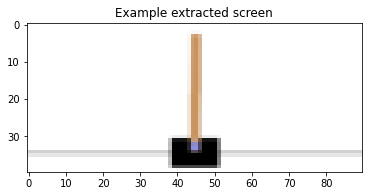

In [72]:
resize = T.Compose([T.ToPILImage(),
                    T.Resize(40, interpolation=Image.CUBIC),
                    T.ToTensor()])


def get_cart_location(screen_width):
    world_width = env.x_threshold * 2
    scale = screen_width / world_width
    return int(env.state[0] * scale + screen_width / 2.0)  # MIDDLE OF CART

def get_screen():
    # Returned screen requested by gym is 400x600x3, but is sometimes larger
    # such as 800x1200x3. Transpose it into torch order (CHW).
    screen = env.render().transpose((2, 0, 1))
    # Cart is in the lower half, so strip off the top and bottom of the screen
    _, screen_height, screen_width = screen.shape
    screen = screen[:, int(screen_height*0.4):int(screen_height * 0.8)]
    view_width = int(screen_width * 0.6)
    cart_location = get_cart_location(screen_width)
    if cart_location < view_width // 2:
        slice_range = slice(view_width)
    elif cart_location > (screen_width - view_width // 2):
        slice_range = slice(-view_width, None)
    else:
        slice_range = slice(cart_location - view_width // 2,
                            cart_location + view_width // 2)
    # Strip off the edges, so that we have a square image centered on a cart
    screen = screen[:, :, slice_range]
    # Convert to float, rescale, convert to torch tensor
    # (this doesn't require a copy)
    screen = np.ascontiguousarray(screen, dtype=np.float32) / 255
    screen = torch.from_numpy(screen)
    # Resize, and add a batch dimension (BCHW)
    return resize(screen).unsqueeze(0)


env.reset()
plt.figure()
plt.imshow(get_screen().cpu().squeeze(0).permute(1, 2, 0).numpy(),
           interpolation='none')
plt.title('Example extracted screen')
plt.show()

In [73]:
BATCH_SIZE = 128
GAMMA = 0.999
EPS_START = 0.9
EPS_END = 0.05
EPS_DECAY = 200
TARGET_UPDATE = 10

# Get screen size so that we can initialize layers correctly based on shape
# returned from AI gym. Typical dimensions at this point are close to 3x40x90
# which is the result of a clamped and down-scaled render buffer in get_screen()
init_screen = get_screen()
_, _, screen_height, screen_width = init_screen.shape

# Get number of actions from gym action space
n_actions = env.action_space.n

policy_net = DQN(screen_height, screen_width, n_actions).to(device)
target_net = DQN(screen_height, screen_width, n_actions).to(device)
target_net.load_state_dict(policy_net.state_dict())
target_net.eval()

optimizer = optim.RMSprop(policy_net.parameters())
memory = ReplayMemory(10000)


steps_done = 0


def select_action(state):
    global steps_done
    sample = random.random()
    eps_threshold = EPS_END + (EPS_START - EPS_END) * \
        math.exp(-1. * steps_done / EPS_DECAY)
    steps_done += 1
    if sample > eps_threshold:
        with torch.no_grad():
            # t.max(1) will return largest column value of each row.
            # second column on max result is index of where max element was
            # found, so we pick action with the larger expected reward.
            return policy_net(state).max(1)[1].view(1, 1)
    else:
        return torch.tensor([[random.randrange(n_actions)]], device=device, dtype=torch.long)


episode_durations = []


def plot_durations():
    plt.figure(2)
    plt.clf()
    durations_t = torch.tensor(episode_durations, dtype=torch.float)
    plt.title('Training...')
    plt.xlabel('Episode')
    plt.ylabel('Duration')
    plt.plot(durations_t.numpy())
    # Take 100 episode averages and plot them too
    if len(durations_t) >= 100:
        means = durations_t.unfold(0, 100, 1).mean(1).view(-1)
        means = torch.cat((torch.zeros(99), means))
        plt.plot(means.numpy())

    plt.pause(0.001)  # pause a bit so that plots are updated
    if is_ipython:
        display.clear_output(wait=True)
        display.display(plt.gcf())

In [74]:
def optimize_model():
    if len(memory) < BATCH_SIZE:
        return
    transitions = memory.sample(BATCH_SIZE)
    # Transpose the batch (see https://stackoverflow.com/a/19343/3343043 for
    # detailed explanation). This converts batch-array of Transitions
    # to Transition of batch-arrays.
    batch = Transition(*zip(*transitions))

    # Compute a mask of non-final states and concatenate the batch elements
    # (a final state would've been the one after which simulation ended)
    non_final_mask = torch.tensor(tuple(map(lambda s: s is not None,
                                          batch.next_state)), device=device, dtype=torch.bool)
    non_final_next_states = torch.cat([s for s in batch.next_state
                                                if s is not None])
    state_batch = torch.cat(batch.state)
    action_batch = torch.cat(batch.action)
    reward_batch = torch.cat(batch.reward)

    # Compute Q(s_t, a) - the model computes Q(s_t), then we select the
    # columns of actions taken. These are the actions which would've been taken
    # for each batch state according to policy_net
    state_action_values = policy_net(state_batch).gather(1, action_batch)

    # Compute V(s_{t+1}) for all next states.
    # Expected values of actions for non_final_next_states are computed based
    # on the "older" target_net; selecting their best reward with max(1)[0].
    # This is merged based on the mask, such that we'll have either the expected
    # state value or 0 in case the state was final.
    next_state_values = torch.zeros(BATCH_SIZE, device=device)
    next_state_values[non_final_mask] = target_net(non_final_next_states).max(1)[0].detach()
    # Compute the expected Q values
    expected_state_action_values = (next_state_values * GAMMA) + reward_batch

    # Compute Huber loss
    criterion = nn.SmoothL1Loss()
    loss = criterion(state_action_values, expected_state_action_values.unsqueeze(1))

    # Optimize the model
    optimizer.zero_grad()
    loss.backward()
    for param in policy_net.parameters():
        param.grad.data.clamp_(-1, 1)
    optimizer.step()

In [75]:
num_episodes = 50
for i_episode in range(num_episodes):
    # Initialize the environment and state
    env.reset()
    last_screen = get_screen()
    current_screen = get_screen()
    state = current_screen - last_screen
    for t in count():
        # Select and perform an action
        action = select_action(state)
        _, reward, done, _, _ = env.step(action.item())
        reward = torch.tensor([reward], device=device)

        # Observe new state
        last_screen = current_screen
        current_screen = get_screen()
        if not done:
            next_state = current_screen - last_screen
        else:
            next_state = None

        # Store the transition in memory
        memory.push(state, action, next_state, reward)

        # Move to the next state
        state = next_state

        # Perform one step of the optimization (on the policy network)
        optimize_model()
        if done:
            episode_durations.append(t + 1)
            plot_durations()
            break

        # Update the target network, copying all weights and biases in DQN
        if t % TARGET_UPDATE == 0:
            target_net.load_state_dict(policy_net.state_dict())

print('Complete')
env.render()
env.close()
plt.ioff()
plt.show()

<Figure size 432x288 with 0 Axes>

Complete


<Figure size 432x288 with 0 Axes>